In [65]:
# Cài đặt (nếu chưa có sẵn)
%pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ipywidgets as widgets

In [67]:
# Không nên dùng inline
#%matplotlib inline

In [68]:
sns.set(rc={'figure.figsize':(7, 5)})

**Review: Linear Regression với y=ax+b**

In [69]:
# Linear Regression voi y = ax + b
a = 3
b = np.random.normal(0,2,200) #Phân bố chuẩn
x = np.linspace(0,10,200) #Tạo dãy số cách đều nhau
y = a*x + b
y.size

200

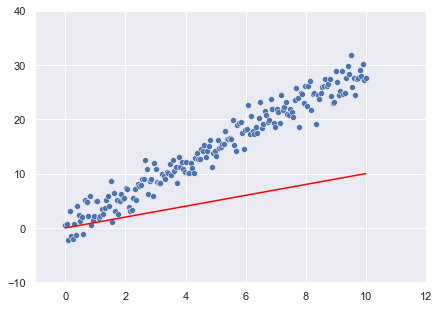

In [70]:
def Ve_Ham_So(aa=2):
    bb = 0
    xx = np.array([0,10])
    yy = xx*aa + bb
    sns.scatterplot(x=x,y=y)
    sns.lineplot(x=xx, y=yy, color='red')
    
    plt.xlim([-1,12])
    plt.ylim([-10,40])
    plt.show()
    plt.close('all')
Ve_Ham_So(1)

# 1. Giới thiệu

**Tự tìm giá trị cho a và b**

In [71]:
w = widgets.interact(Ve_Ham_So, aa=(0,5,0.2))

interactive(children=(FloatSlider(value=2.0, description='aa', max=5.0, step=0.2), Output()), _dom_classes=('w…

In [72]:
def Ve_Ham_So2(aa=2, bb=0, cc='r', show_line=True, text='Linear Regression'):
    xx = np.array([0,10])
    yy = xx*aa + bb
    sns.scatterplot(x=x,y=y)
    
    if show_line:
        sns.lineplot(x=xx, y=yy, color=cc)
    plt.annotate(text, (0, 35))
    
    plt.xlim([-1,12])
    plt.ylim([-10,40])
    plt.show()
    plt.close('all')

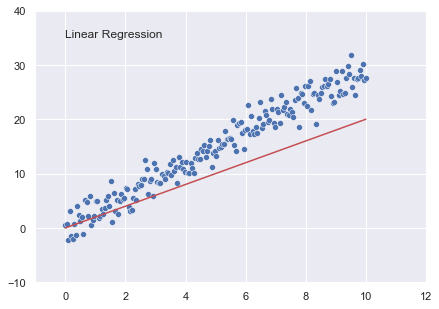

In [73]:
Ve_Ham_So2()

In [74]:
w = widgets.interact(Ve_Ham_So2, 
                     aa=(0,5,0.2), 
                     bb=(-2,2,0.2), 
                     cc=['red', 'green', 'blue'],
                     show_line=False,
                    )

interactive(children=(FloatSlider(value=2.0, description='aa', max=5.0, step=0.2), FloatSlider(value=0.0, desc…

# 2. Các loại widgets thông dụng

Tham khảo: https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

In [75]:
# ipywidgets có sử dụng hàm display, clear_output của module display thuộc thư viện IPython
# (nhằm hiển thị các widgets một cách chủ động)
# IPython là thư viện nền tảng của Python nên cần import để sử dụng

from IPython.display import display, clear_output

## 2.1. Slider

In [76]:
w0 = widgets.Intr(value=3, min=0, max=10, step=2)
display(w0)
print(type(w0)) #class

IntSlider(value=3, max=10, step=2)

<class 'ipywidgets.widgets.widget_int.IntSlider'>


In [77]:
widgets.FloatSlider(value=2.5, min=1.2, max=5.6, step=0.2)

FloatSlider(value=2.5, max=5.6, min=1.2, step=0.2)

In [78]:
w1 = widgets.FloatSlider(value=2.5, min=1.2, max=5.6, step=0.2)
display(w1)

FloatSlider(value=2.5, max=5.6, min=1.2, step=0.2)

**Tạo biến trỏ đến widget để lấy ra kết quả**

In [79]:
print(w1.value)

2.5


**HBox và VBox**

In [80]:
widgets.HBox([w0,w1])

In [81]:
widgets.VBox([w0,w1])

## 2.2. Textbox & Label

In [82]:
widgets.IntText(value=10, step=3)

IntText(value=10, step=3)

In [83]:
widgets.BoundedIntText(value=3, min=-3, max=6, step=1)

BoundedIntText(value=3, max=6, min=-3)

In [84]:
widgets.FloatText(value=2.3, step=0.5)

FloatText(value=2.3, step=0.5)

In [85]:
widgets.BoundedFloatText(description='Nhập số Thực:', 
                         min=1.2, max=5.6, step=0.2
                        )

BoundedFloatText(value=1.2, description='Nhập số Thực:', max=5.6, min=1.2, step=0.2)

**Tạo biến trỏ đến widget để lấy ra kết quả**

In [86]:
# Thêm description
# Lưu ý: Cần set tham số style để hiển thị được description dài
w2 = widgets.BoundedFloatText(description='Nhập số Thực:', 
                              min=1.2, max=5.6, step=0.2,
                              style = {'description_width': 'initial'},
                             )
display(w2)

BoundedFloatText(value=1.2, description='Nhập số Thực:', max=5.6, min=1.2, step=0.2, style=DescriptionStyle(de…

In [87]:
# Lấy ra kết quả đã nhập
print(w2.value)

1.2


**Kết hợp 2 widgets bằng `.link`, `.dlink` hoặc `.jslink`**
1. .link và .dlink: Python kernel, sẽ không hoạt động sau khi tắt kernel
2. .jslink: Javascript (client), vẫn chạy sau khi tắt kernel

In [88]:
# LƯU Ý: Nếu gọi display cho biến đã display rồi và dùng hàm link có thể 
# gây loop vô tận!!!
# Cần đặt tên biến mới (hoặc xóa biến cũ)

w3 = widgets.FloatSlider(value=2.5, min=1.2, max=5.6, step=0.2)
w4 = widgets.BoundedFloatText(description='Nhập số Thực:', 
                              min=1.2, max=5.6, step=0.2,
                              style = {'description_width': 'initial'},
                             )
widgets.link((w3, 'value'), (w4, 'value'))
display(w3,w4)

FloatSlider(value=2.5, max=5.6, min=1.2, step=0.2)

BoundedFloatText(value=2.5, description='Nhập số Thực:', max=5.6, min=1.2, step=0.2, style=DescriptionStyle(de…

In [89]:
# Sử dụng jslink

w3 = widgets.FloatSlider(value=2.5, min=1.2, max=5.6, step=0.2)
w4 = widgets.BoundedFloatText(description='Nhập số Thực:', 
                              min=1.2, max=5.6, step=0.2,
                              style = {'description_width': 'initial'},
                             )
widgets.jslink((w3, 'value'), (w4, 'value'))
display(w3,w4)

FloatSlider(value=2.5, max=5.6, min=1.2, step=0.2)

BoundedFloatText(value=1.2, description='Nhập số Thực:', max=5.6, min=1.2, step=0.2, style=DescriptionStyle(de…

**TextBox và TextArea cho dữ liệu chuỗi**

In [90]:
# Ví dụ: nhập tên, password
wText1 = widgets.Text(value='abc', description='Nhập Text Vào Đây',                      
                      style = {'description_width': 'initial'})
display(wText1)

Text(value='abc', description='Nhập Text Vào Đây', style=DescriptionStyle(description_width='initial'))

In [91]:
print(wText1.keys)
print(wText1.value)

['_dom_classes', '_model_module', '_model_module_version', '_model_name', '_view_count', '_view_module', '_view_module_version', '_view_name', 'continuous_update', 'description', 'description_tooltip', 'disabled', 'layout', 'placeholder', 'style', 'value']
abc


In [92]:
wText2 = widgets.Textarea(value='abc \n xyz', description='Nhập Text Vào Đây')
display(wText2)

Textarea(value='abc \n xyz', description='Nhập Text Vào Đây')

In [93]:
wText2.value

'abc \n xyz'

**Sử dụng `widgets.Label()` để tạo description**

In [94]:
wLabel = widgets.Label(value='Nhập Text Vào Đây')
wText2 = widgets.Textarea(value='abc \n xyz', continuous_update=True)
display(wLabel, wText2)

Label(value='Nhập Text Vào Đây')

Textarea(value='abc \n xyz')

In [95]:
wTextareaBox = widgets.VBox([wLabel, wText2])
display(wTextareaBox)

## 2.3. Checkbox & Radiobuttons

In [96]:
wCheckbox = widgets.Checkbox(value=True, description='Hiển thị')
display(wCheckbox)

Checkbox(value=True, description='Hiển thị')

In [97]:
wCheckbox.value

True

In [98]:
wRB = widgets.RadioButtons(description='Ngành học của bạn',
                           options=['IT', 'Kinh tế - Tài chính', 'Kỹ thuật - Công nghệ', 'Khác']
                          )
display(wRB)

RadioButtons(description='Ngành học của bạn', options=('IT', 'Kinh tế - Tài chính', 'Kỹ thuật - Công nghệ', 'K…

In [99]:
print(wRB.value)
print(wRB.index)

IT
0


## 2.4. Dropdown list

In [100]:
wSelect = widgets.Select(description='Chọn Loại Biểu Đồ',
                         label='Scatter', #value='Histogram',
                         row=2,
                         options=['Cột', 'Scatter', 'Histogram']
                        )
display(wSelect)

Select(description='Chọn Loại Biểu Đồ', index=1, options=('Cột', 'Scatter', 'Histogram'), value='Scatter')

In [101]:
print(wSelect.value)
print(wSelect.index)

Scatter
1


In [102]:
wSelectM = widgets.SelectMultiple(description='Chọn Chi Nhánh',
                                  options=['CN1', 'CN2', 'CN3', 'CN4', 'CN5'],
                                  value=['CN1'],
                                  row=3
                                 )
display(wSelectM)

SelectMultiple(description='Chọn Chi Nhánh', index=(0,), options=('CN1', 'CN2', 'CN3', 'CN4', 'CN5'), value=('…

In [103]:
print(wSelectM.index)
print(wSelectM.value)

(0,)
('CN1',)


## 2.5. Buttons

In [104]:
# button_style: 'success', 'info', 'warning', 'danger' or ''
wButton = widgets.Button(description='Chọn',
                         button_style='info',
                         tooltip='Bấm vào đây',
                         icon='check' # 'fa-bullhorn', 'bullhorn','folder-open',...
              )
display(wButton)

Button(button_style='info', description='Chọn', icon='check', style=ButtonStyle(), tooltip='Bấm vào đây')

In [137]:
def ThucHien(click):
    print(click)
    print('Xin chao cac ban')
wButton.on_click(ThucHien)
display(wButton)
# display(Thuchien())

Button(button_style='info', description='Chọn', icon='check', style=ButtonStyle(), tooltip='Bấm vào đây')

## 2.6. Output widgets

In [106]:
wOutput = widgets.Output(layout={'border': '1px solid black'})
display(wOutput)

Output(layout=Layout(border='1px solid black'))

In [107]:
with wOutput:
    wOutput.clear_output()
    print('abc')
    print('xyz')
    print('234')
    display(wButton)    

In [129]:
display(wOutput)
with wOutput:
    def ThucHien1(click):
        # wOutput.clear_output()
        print('Da Bam Nut')
        #display(wButton)
        
    wOutput.clear_output()
    print('abc')
    print('xyz')
    print('234')
    
    display(wButton)
    wButton.on_click(ThucHien1)

Output(layout=Layout(border='1px solid black'), outputs=({'name': 'stdout', 'text': 'abc\nxyz\n234\nabc\nxyz\n…

In [127]:
wButton2 = widgets.Button(description='Chọn',
                         button_style='info',
                         tooltip='Bấm vào đây',
                         icon='check' # 'fa-bullhorn', 'bullhorn','folder-open',...
              )
wButton2.on_click(ThucHien2)
def ThucHien2(click):
    wOutput.clear_output()
    with wOutput:
        print('Hello World!')
widgets.HBox([wButton2, wOutput])

# 3. Hàm `widgets.interact()`

In [110]:
# cú pháp decorator
@widgets.interact()
def Ve_Ham_So3(aa=2, bb=5, cc='r', show_line=False, text='Linear Regression'):
    xx = np.array([0,10])
    yy = xx*aa + bb
    sns.scatterplot(x=x,y=y)
    
    if show_line:
        sns.lineplot(x=xx, y=yy, color=cc)
    plt.annotate(text, (0, 35))
    
    plt.xlim([-1,12])
    plt.ylim([-10,40])
    plt.show()
    plt.close('all')

interactive(children=(IntSlider(value=2, description='aa', max=6, min=-2), IntSlider(value=5, description='bb'…

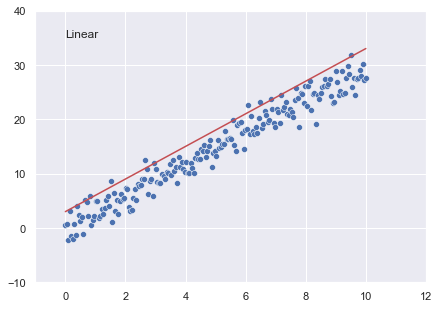

In [111]:
Ve_Ham_So3(aa=3, bb=3, cc='r', show_line=True, text='Linear')

**Sử dụng `interact` cho từng widgets**

In [112]:
w0 = widgets.IntSlider(description='Int:', value=20, min=0, max=50, step=5)
w1 = widgets.FloatSlider(description='Float:', value=0.5, min=0, max=1, step=0.02)
wSelectM = widgets.SelectMultiple(description='Chọn Chi Nhánh',
                                  options=['CN1', 'CN2', 'CN3', 'CN4', 'CN5'],
                                  value=['CN1'],
                                  row=3
                                 )
def InKetQua(thamso1=1, thamso2=2.1, thamso3='ABC'):
    print(thamso1)
    print(thamso2)
    print(thamso3)
#     t = thamso1 + thamso2
#     print(t)
    
display(w0, w1, wSelectM)

IntSlider(value=20, description='Int:', max=50, step=5)

FloatSlider(value=0.5, description='Float:', max=1.0, step=0.02)

SelectMultiple(description='Chọn Chi Nhánh', index=(0,), options=('CN1', 'CN2', 'CN3', 'CN4', 'CN5'), value=('…

In [113]:
# Thay đổi tham số đầu tiên, fix 2 tham số còn lại
wInteract1 = widgets.interact(InKetQua, thamso1=w0, 
                              thamso2=widgets.fixed(0.5), 
                              thamso3=widgets.fixed('XYZ'))


interactive(children=(IntSlider(value=20, description='Int:', max=50, step=5), Output()), _dom_classes=('widge…

In [114]:
# Chỉ gán widget cho tham số thứ 2
# ==> 2 tham số còn lại được tự tạo ra
wInteract2 = widgets.interact(InKetQua, thamso2=w1)

interactive(children=(IntSlider(value=1, description='thamso1', max=3, min=-1), FloatSlider(value=0.5, descrip…

In [115]:
# Tương tự với tham số 3
wInteract3 = widgets.interact(InKetQua, thamso3=wSelectM)

interactive(children=(IntSlider(value=1, description='thamso1', max=3, min=-1), FloatSlider(value=2.1, descrip…

In [116]:
# Gán widget cho cùng lúc 3 tham số
wInteract1 = widgets.interact(InKetQua, 
                              thamso1=w0, 
                              thamso2=w1, 
                              thamso3=wSelectM
                             )

interactive(children=(IntSlider(value=20, description='Int:', max=50, step=5), FloatSlider(value=0.5, descript…

**Sử dụng cú pháp 'decorator'**

In [117]:
@widgets.interact(kq1=w0, kq2=w1, kq3=wSelectM)
def InKetQua1(kq1=1, kq2=1, kq3=''):
    print(kq1)
    print(kq2)
    print(kq3)

interactive(children=(IntSlider(value=20, description='Int:', max=50, step=5), FloatSlider(value=0.5, descript…

# 4. Hàm `widgets.interactive()` và `widgets.interactive_output()`

**Sử dụng hàm `.interactive`**

In [118]:
# Giả sử bạn muốn sắp xếp các widgets theo ý mình
box = widgets.HBox([widgets.VBox([w0,w1]), wSelectM])
display(box)

# Sau đó muốn tạo interact widgets:
wInKetQua = widgets.interact(InKetQua1, kq1=w0, kq2=w1, kq3=wSelectM)

interactive(children=(IntSlider(value=20, description='Int:', max=50, step=5), FloatSlider(value=0.5, descript…

In [119]:
# Tạo ra một output widget và sử dụng interactive
def InKetQua2(kq1=1, kq2=1, kq3=''):
    with wOutput:
        wOutput.clear_output()
        print(kq1)
        print(kq2)
        print(kq3)
        #Ve_Ham_So2()

# Hiển thị box
box = widgets.HBox([widgets.VBox([w0,w1]), wSelectM])
display(box)
# Tạo kết nối từ các widgets trong box đến hàm
wInKetQua2 = widgets.interactive(InKetQua2, kq1=w0, kq2=w1, kq3=wSelectM)

# Hiển thị output widget
display(wOutput)

Output(layout=Layout(border='1px solid black'), outputs=({'name': 'stdout', 'text': 'abc\nxyz\n234\nabc\nxyz\n…

In [120]:
# Lưu ý: nếu chỉ display kết quả trả về của interactive 
#        thì kết quả giống với việc sử dụng interact
display(wInKetQua2)

interactive(children=(IntSlider(value=20, description='Int:', max=50, step=5), FloatSlider(value=0.5, descript…

In [121]:
wInKetQua2.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'box_style',
 'children',
 'layout']

In [122]:
wInKetQua2.children

(IntSlider(value=20, description='Int:', max=50, step=5),
 FloatSlider(value=0.5, description='Float:', max=1.0, step=0.02),
 SelectMultiple(description='Chọn Chi Nhánh', index=(0,), options=('CN1', 'CN2', 'CN3', 'CN4', 'CN5'), value=('CN1',)),
 Output())

**Sử dụng hàm `.interactive_output`**

In [123]:
aW = widgets.IntSlider(description='a')
bW = widgets.IntSlider(description='b')
cW = widgets.IntSlider(description='c')

def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': aW, 'b': bW, 'c': cW})

widgets.HBox([widgets.VBox([aW, bW, cW]), out])

In [124]:
def InKetQua3(kq1=1, kq2=1, kq3=''):
    print(kq1)
    print(kq2)
    print(kq3)
    Ve_Ham_So2()
box = widgets.HBox([widgets.VBox([w0,w1]), wSelectM])
out = widgets.interactive_output(InKetQua3, 
                                 {'kq1':w0, 'kq2':w1, 'kq3':wSelectM})
display(box, out)

Output()

In [138]:
a = widgets.IntSlider(description='Top:', value=20, min=0, max=50, step=5)
b = widgets.IntSlider(description='Top:', value=20, min=0, max=50, step=5)
c = widgets.IntSlider(description='Top:', value=20, min=0, max=50, step=5)
def on_value_change(change):
    new_a = change['new']
    b.value = new_a
    c.value = b.value
a.observe(on_value_change, names='value')
display(a,b,c)
b.layout.visibility = 'hidden'


IntSlider(value=20, description='Top:', max=50, step=5)

IntSlider(value=20, description='Top:', max=50, step=5)

IntSlider(value=20, description='Top:', max=50, step=5)

In [139]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)
display(button,output)

Button(description='Click Me!', style=ButtonStyle())

Output()